# Sommes de variables aléatoires

## I. Rappels de simulation

### I. 1. Fonctions pythonesques de simulation 

Exécuter le code suivant ; ne pas hésiter à faire plusieurs essais avec des valeurs différentes pour faire des tests. Deviner ce que renvoie la fonction randint. Expliciter ses conditions d'utilisation.

In [ ]:
import random as rd

a = float(input('Choisir une valeur : a = '))
b = float(input('Choisir (encore) une valeur : b = '))

for _ in range(20):
    print(rd.randint(a, b))

Correction : rd.randint(a, b) renvoie un nombre entier aléatoire compris entre a et b et de manière uniforme (chaque entier entre a et b a la même probabilité d'être renvoyé).

Exécuter le code suivant. Deviner ce que renvoie la fonction random.

In [ ]:
for _ in range(20):
    print(rd.random())

Correction : rd.random() renvoie un nombre flottant aléatoire compris entre 0 et 1 et de manière uniforme (chaque décimal entre 0 et 1 a la même probabilité d'être renvoyé).

#### Exercice 1

Proposer un code simulant le choix d'un nombre entier compris entre -3 et 7.

In [ ]:
rd.randint(-3 ,7) #correction

Proposer un code simulant le choix d'un nombre décimal entre 0 et 2.

In [ ]:
2*rd.random() #correction

Proposer un code simulant le choix d'un nombre appartenant à l'ensemble {2 ; 2,1 ; 2,2 ; ... ; 2,9}.

In [ ]:
2 + rd.randint(0, 9)/10 #correction

### I. 2. Exemples de simulation de variables aléatoires

La variable aléatoire $X$ a la loi de probabilité donnée par :$\begin{array}{|c|c|c|} \hline x & 0 & 1 \\ \hline P(X=x) & 0,2 & 0,8 \\\hline\end{array}$, on peut la simuler par la fonction en Python $\mathtt{simu\_X}$ :

In [ ]:
import random as rd

def simu_X(): #on définit une fonction sans argument ...
    alea = rd.randint(1, 10)
    if alea <= 2: #... on crée un test se réalisant avec la probabilité 0,2
        return 0 #... qui retourne la valeur de probabilité 0,2
    return 1 #si le test a renvoyé False, on renvoie l'autre valeur.

print([simu_X() for _ in range(40)])

La variable aléatoire $Y$ a loi de probabilité donnée par :$\begin{array}{|c|c|c|c|} \hline y & -1 & 0 & 1 \\ \hline P(Y=y) & 0,4 & 0,35 & 0,25 \\\hline\end{array}$, on peut la simuler par la fonction en Python $\mathtt{simu\_Y}$ :

In [ ]:
def simu_Y(): #on définit une fonction sans argument ...
    alea = rd.randint(1, 100)
    if alea <= 40: #... on crée un test se réalisant avec la probabilité 0,4
        return -1 #... qui retourne la valeur de probabilité 0,4
    if alea <= 75: #ce test renvoie True avec la probabilité 0,35 car le programme est exécuté linéairement
        return 0
    return 1 #si ce test a renvoyé False aussi, on renvoie la dernière valeur.

#### Exercice 2

La variable aléatoire $Z$ a loi de probabilité donnée par :$\begin{array}{|c|c|c|c|} \hline z & 0 & 2 & 3 \\ \hline P(Z=z) & 0,37 & 0,52 & 0,11 \\\hline\end{array}$. Proposer une fonction en Python $\mathtt{simu\_Z}$ simulant $Z$ :

In [ ]:
def simu_Z(): 
    alea = rd.randint(1, 100)
    if alea <= 37: 
        return 0 
    if alea <= 89: #37+52=89
        return 2
    return 3

#### Exercice 3

La fonction en Python simu1 simule une variable aléatoire $T$.
- Quelles sont les valeurs prises par $T$ ?
- Donner la loi de probabilité associée à $T$.

In [ ]:
def simu1():
    a = rd.randint(1, 1000)
    if a <= 361:
        return -5
    if a <= 456:
        return 0
    if a <= 925:
        return 5
    return 10

Correction : la variable aléatoire $T$ a loi de probabilité donnée par :$\begin{array}{|c|c|c|c|c|} \hline t & -5 & 0 & 5 & 10\\ \hline P(T=t) & 0,361 & 0,095 & 0,469 & 0,075 \\\hline\end{array}$.

   ## I. 3. Estimation

### I. 3. 1. Probabilité

On souhaite estimer la probabilité que la fonction $\mathtt{rd.triangular(0, 5)}$ renvoie une valeur inférieure à 2.

In [ ]:
cpt = 0 #var. compteur
for k in range(1000): #on fait 1000 simulations :
    if rd.triangular(0, 5) <= 2:
        cpt = cpt + 1 #la var. cpt augmente de 1 ssi triangular(0, 5) est inf. à 2
print(cpt/1000) #la fréquence de l'év. « triangular(0, 5) <= 2 » est une approx. de la proba

#### Exercice 4

En s'inspirant du code précédent, proposer un script pour chacune des estimations suivantes.
1. Estimer la probabilité que rd.weibullvariate(1, 2) est supérieure à 2.
2. Estimer la probabilité que rd.betavariate(2, 5) est inférieure à 0,4.
3. Estimer la probabilité que rd.gauss(1, 2) est comprise entre -3 et 5.

In [ ]:
cpt = 0 #correction proba1
for k in range(1000): 
    if rd.weibullvariate(1, 2) >= 2:
        cpt = cpt + 1 
print(cpt/1000) 

In [ ]:
cpt = 0 #correction proba2
for k in range(1000): 
    if rd.betavariate(2, 5) <= 0.4:
        cpt = cpt + 1 
print(cpt/1000) 

In [ ]:
cpt = 0 #correction proba3
for k in range(1000): 
    if -3 <= rd.gauss(1, 2) <= 5:
        cpt = cpt + 1 
print(cpt/1000) 

### I. 3. 2. Espérance

On souhaite estimer l'espérance de la variable aléatoire $X$ précédemment simulée par $\mathtt{simu\_X}$, de loi de probabilité donnée par :$\begin{array}{|c|c|c|} \hline x & 0 & 1 \\ \hline P(X=x) & 0,2 & 0,8 \\\hline\end{array}$. 

In [ ]:
cpt = 0 #var. compteur
for k in range(1000): #on fait 1000 simulations
    cpt = cpt + simu_X() #cela revient à faire la somme de 1000 simu de simu_X()
print(cpt/1000) #la moyenne des simulations est une approximation de l'espérance

On peut aussi utiliser une liste pour un code plus synthétique.

In [ ]:
esp = sum([simu_X() for k in range(1000)])/1000
print(esp)

#### Exercice 5

En s'inspirant du code précédent, proposer un script estimant l'espérance de chacune des fonctions utilisées à l'exercice précédent.

In [ ]:
cpt = 0 #correction esp1
for k in range(1000): 
    cpt = cpt + rd.weibullvariate(1, 2)
print(cpt/1000) 

In [ ]:
cpt = 0 #correction esp2
for k in range(1000): 
    cpt = cpt + rd.betavariate(2, 5)
print(cpt/1000) 

In [ ]:
cpt = 0 #correction esp3
for k in range(1000): 
    cpt = cpt + rd.gauss(1, 2)
print(cpt/1000) 

### I. 3. 3. Variance, écart type

On souhaite estimer l'espérance de la variable aléatoire $X$ précédemment simulée par $\mathtt{simu\_X}$. 

In [ ]:
import numpy as np

mu = 0 #var. espérance
va = 0 #var. variance

for k in range(1000): #on fait 1000 simulations
    mu = mu + simu_X() #cela revient à faire la somme de 1000 simu de simu_X()
mu = mu/1000 #la moyenne des simulations est une approximation de l'espérance
print(mu)

for k in range(1000): #on fait 1000 simulations
    va = va + (simu_X()-mu)**2 #cela revient à faire la somme de 1000 carrés des écarts simu de simu_X()
va = va/1000 #la moyenne de ces écarts est une approximation de la variance
print(va)

print(np.sqrt(va)) #l'écart type est la racine carrée de la variance

Ici encore, un code alternatif à l'aide de listes.

In [ ]:
esp = sum([simu_X() for k in range(1000)])/1000

var = sum([(simu_X()-esp)**2 for k in range(1000)])/1000
print(var)

print(np.sqrt(var))

#### Exercice  6

En s'inspirant du code précédent, proposer un script estimant l'écart type de chacune des fonctions utilisées à l'exercice précédent.

In [ ]:
import numpy as np #correction var1

mu = 0 
va = 0 

for k in range(1000): 
    mu = mu + rd.weibullvariate(1, 2)
mu = mu/1000 
print(mu)

for k in range(1000): 
    va = va + (rd.weibullvariate(1, 2)-mu)**2 
va = va/1000 
print(va)

print(np.sqrt(va)) 

In [ ]:
mu = 0 #correction var2
va = 0 

for k in range(1000): 
    mu = mu + rd.betavariate(2, 5)
mu = mu/1000 
print(mu)

for k in range(1000): 
    va = va + (rd.betavariate(2, 5)-mu)**2 
va = va/1000 
print(va)

print(np.sqrt(va)) 

In [ ]:
mu = 0 #correction var3
va = 0 

for k in range(1000): 
    mu = mu + rd.gauss(1, 2)
mu = mu/1000 
print(mu)

for k in range(1000): 
    va = va + (rd.gauss(1, 2)-mu)**2 
va = va/1000 
print(va)

print(np.sqrt(va)) 

### I. 3. 4. Représentation d'une loi

On peut représenter la simulation une loi de probabilité.

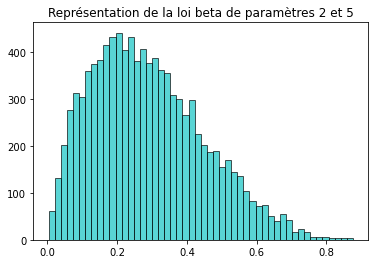

In [1]:
import random as rd
import matplotlib.pyplot as plt

data = [rd.betavariate(2, 5) for _ in range(10000)]

plt.hist(data, 50, color='c', edgecolor='k', alpha=0.65)
plt.title('Représentation de la loi beta de paramètres 2 et 5')
plt.show()

## II. Sommes de variables aléatoires

On lance deux dés à 6 faces numérotées de 1 à 6. On fait la somme des deux numéros inscrits sur les faces supérieures.
On note $S$ la variable aléatoire correspondant à cette somme.
1. Préciser l'univers de cette expérience aléatoire.
2. Exécuter le code qui suit. Parmi les trois représentations de lois, laquelle semble la mieux adpatée pour représenter la loi de la somme ? Argumenter.

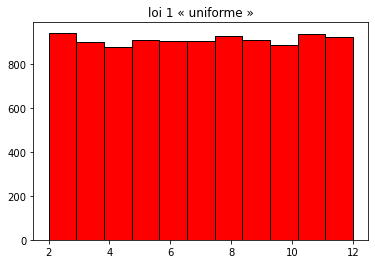

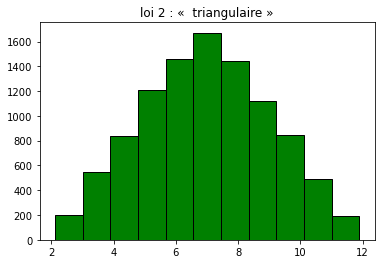

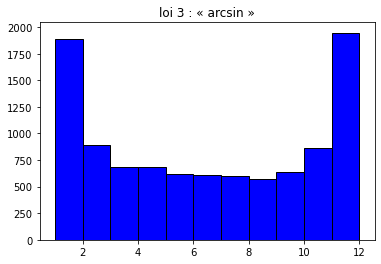

In [2]:
data1 = [rd.uniform(2,12) for _ in range(10000)]
data2 = [rd.triangular(2,12) for _ in range(10000)]
data3 = [1+ 11*rd.betavariate(0.5, 0.5) for _ in range(10000)]


plt.hist(data1, 11, color='r', edgecolor='k')
plt.title('loi 1 « uniforme »')
plt.show()
plt.hist(data2, 11, color='g', edgecolor='k')
plt.title('loi 2 : «  triangulaire »')
plt.show()
plt.hist(data3, 11, color='b', edgecolor='k')
plt.title('loi 3 : « arcsin »')
plt.show()

3. Coder une fonction en Python simulant la variable aléatoire $S$. Confirmer ou infirmer votre résultat précédent.

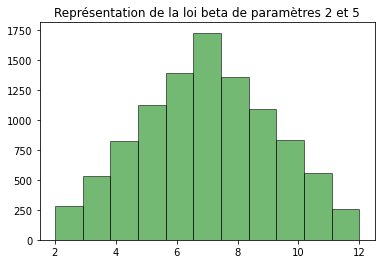

In [5]:
def simu_S(): #correction
    return rd.randint(1, 6) + rd.randint(1, 6)

data = [simu_S() for _ in range(10000)]

plt.hist(data, 11, color='g', edgecolor='k', alpha=0.55)
plt.title('Représentation de la loi beta de paramètres 2 et 5')
plt.show()

Par simulation, on retrouve une loi triangulaire. On peut justifier aussi par le raisonnement suivant.

On réalise un tableau à double entrée représentant les 36 sommes possibles.

$\begin{array}{|*{7}{c|}}\hline \text{Dé1}/\text{Dé2} & \mathbf{1} & \mathbf{2} & \mathbf{3} & \mathbf{4} & \mathbf{5} & \mathbf{6} \\ \hline \mathbf{1} & 2 & 3 & 4 & 5 & 6 & 7 \\ \hline \mathbf{2} & 3 & 4 & 5 & 6 & 7 & 8 \\ \hline \mathbf{3} & 4 & 5 & 6 & 7 & 8 & 9 \\ \hline \mathbf{4} & 5 & 6 & 7 & 8 & 9 & 10 \\ \hline \mathbf{5} & 6 & 7 & 8 & 9 & 10 & 11 \\ \hline \mathbf{6} & 7 & 8 & 9 & 10 & 11 & 12 \\ \hline \end{array}$.

Chaque somme a la même probabilité de se réaliser $\frac{1}{36}$ mais certains résultats de somme se trouvent plus souvent : 7, puis 5 et 6, ... et d'autres moins souvent 1 et 12. On valide donc le modèle « traingulaire ».